In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

In [2]:
# Load MNIST dataset
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

# Filter to include only the digits 0, 1, and 2
mask_train = np.isin(y_train_full, [0, 1, 2])
mask_test = np.isin(y_test_full, [0, 1, 2])

X_train = X_train_full[mask_train]
y_train = y_train_full[mask_train]
X_test = X_test_full[mask_test]
y_test = y_test_full[mask_test]

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [5]:
def calculate_hu_moments(images):
    hu_moments = []
    for img in images:
        moments = cv2.moments(img)
        hu_moments.append(cv2.HuMoments(moments).flatten())
    return np.array(hu_moments)

In [6]:
# Calculate Hu Moments for training and testing images
X_train_hu = calculate_hu_moments(X_train)
X_test_hu = calculate_hu_moments(X_test)

In [7]:
# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_hu, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 85.73%
Precision: 87.43%
Recall: 85.73%
F1 Score: 85.33%


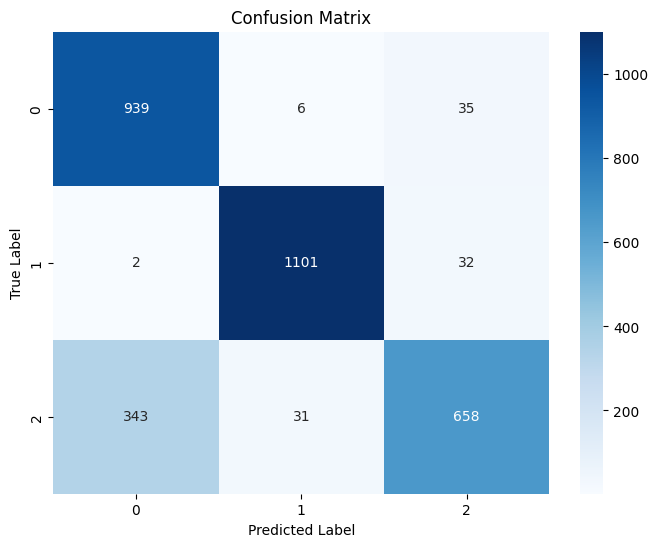

In [12]:
# Predict on test set
y_pred = model.predict(X_test_hu)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

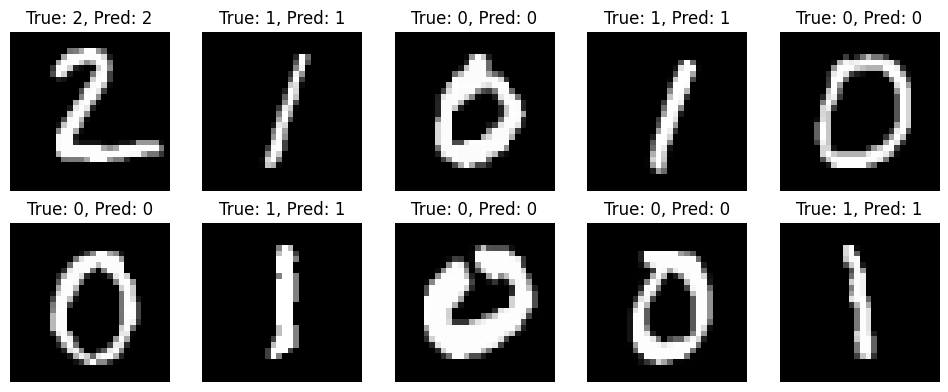

In [13]:
# Visualize some images with their predicted labels
def visualize_predictions(images, labels, predictions, num_images=10):
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {labels[i]}, Pred: {predictions[i]}")
        plt.axis('off')
    plt.show()

visualize_predictions(X_test, y_test, y_pred)
